### Подключим библиотеки

In [26]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import math

%matplotlib inline
import matplotlib.pyplot as plt

### Получим данные

In [121]:
data = pd.read_csv('lab223.csv', header=0, sep=';')

# Константы
L = 367e-3
r_1 = 0.05e-3 / 2
r_2 = 10e-3 / 2
R_0 = 10
temp_values = ['21', '30', '50', '54']

# Массив данных
data = np.array(data)
data1 = [[] for _ in range(4)]

last_T = data[0][3]
for line in data:
    index = int(line[0]) - 1
    line = np.delete(line, [0, 3])
    data1[index].append(line)

data = data1

for i in range(4):
    data[i] = np.transpose(data[i])
    
data[0] = np.delete(data[0], [0, 1], axis=1)
data[1] = np.delete(data[1], [1, 6], axis=1)
data[2] = np.delete(data[2], [0, 3, 6, 7], axis=1)
data[3] = np.delete(data[3], [0, 2, 4, 6], axis=1)

for i in range(4):
    dataframe = pd.DataFrame(np.transpose(data[i]), columns=['Uэ', 'Uн'])
    dataframe.to_csv('t' + str(temp_values[i]) + '.csv')

print('Сырые данные (Uэ, Uн)\n' + '-' * 80)
    
for d in data:
    print(d)
    print('-' * 80)

Сырые данные (Uэ, Uн)
--------------------------------------------------------------------------------
[[0.10004 0.12507 0.14993 0.20047 0.22498 0.25007]
 [1.5065  1.8846  2.2613  3.0297  3.4045  3.7892 ]]
--------------------------------------------------------------------------------
[[0.05014 0.10011 0.12519 0.15011 0.19993 0.2505 ]
 [0.76097 1.5205  1.9025  2.2831  3.0469  3.8271 ]]
--------------------------------------------------------------------------------
[[0.075002 0.100006 0.15019  0.20008 ]
 [1.16     1.5474   2.327    3.1054  ]]
--------------------------------------------------------------------------------
[[0.07501 0.12499 0.20001 0.25003]
 [1.1638  1.9412  3.1135  3.9015 ]]
--------------------------------------------------------------------------------


### Построим график $Q(R)$ для каждой из температур

$$Q = \frac{U_\text{н}U_\text{э}}{10}$$

$$R = 10\frac{U_\text{н}}{U_\text{э}}$$

Определим по графику наклон $\dfrac{dQ}{dR}$ и сопротивление нити $R_0$ при нулевой выделяемой мощности.

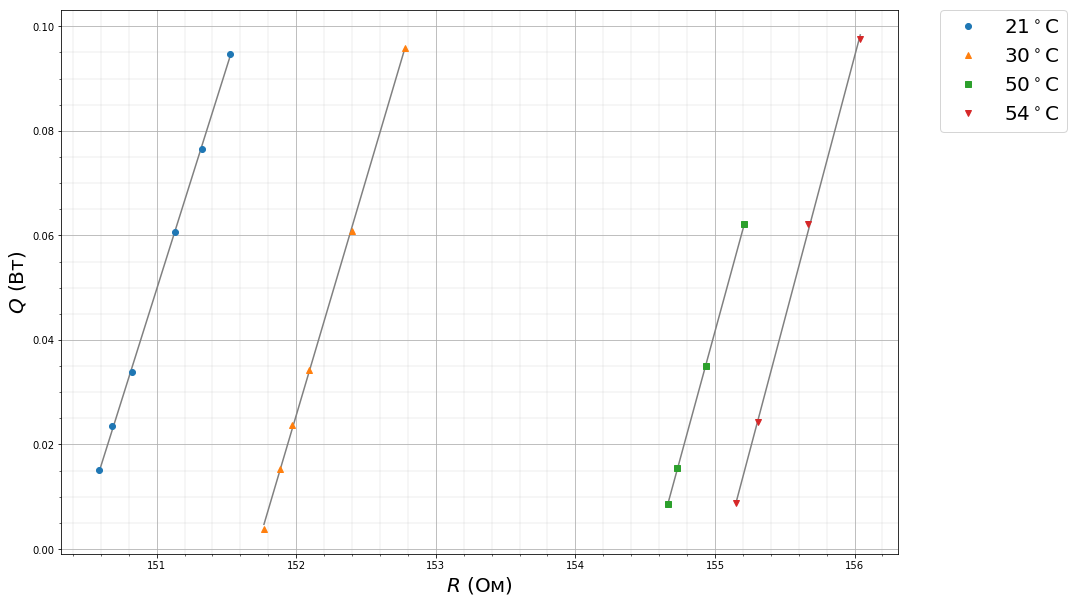

  dQ/dR          R
[[8.46850008e-02 1.50413306e+02]
 [9.02097363e-02 1.51716653e+02]
 [9.77037928e-02 1.54574296e+02]
 [1.00529008e-01 1.55062890e+02]]


In [149]:
# Аппроксимация по МНК
def f(x, a, b):
    return a * x + b

def f1(y, a, b):
    return (y - b) / a

markers = ['o', '^', 's', 'v']
plt.figure(figsize = (15, 10))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.ylabel('$Q$ (Вт)', fontsize=20)
plt.xlabel('$R$ (Ом)', fontsize=20)

dqdr = []
r = []
for i in range(4):
    dr = 10 * data[i][1] / data[i][0]
    dq = data[i][0] * data[i][1] / 10
    q_r_opt, q_r_cov = curve_fit(f, dr, dq)
    plt.plot(dr, f(dr, *q_r_opt), color='grey')
    plt.plot(dr, dq, marker=markers[i], linestyle='', label=(temp_values[i] + '$^\circ$C'))
    dqdr.append(q_r_opt[0])
    r.append(f1(0, *q_r_opt))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()

print(' ' * 2 + 'dQ/dR' + ' ' * 10 + 'R')
print(np.transpose([dqdr, r]))

In [76]:
r = np.array(r)
t = np.array([21.1, 30.0, 49.95, 54.05])

print(' ' * 2 + 'R' + ' ' * 13 + 'T')
print(np.transpose([r, t]))

  R             T
[[150.41330554  21.1       ]
 [151.71665306  30.        ]
 [154.57429633  49.95      ]
 [155.06288966  54.05      ]]


### Построим по значениям $R_0$ график зависимости сопротивления нити от температуры. 
Определим по графику наклон $\dfrac{dR}{dT}$ и температурный коэффициент сопротивления материала нити $\alpha = \dfrac{1}{R_{273}}\dfrac{dR}{dT}$ и сравним его с табличным значением.

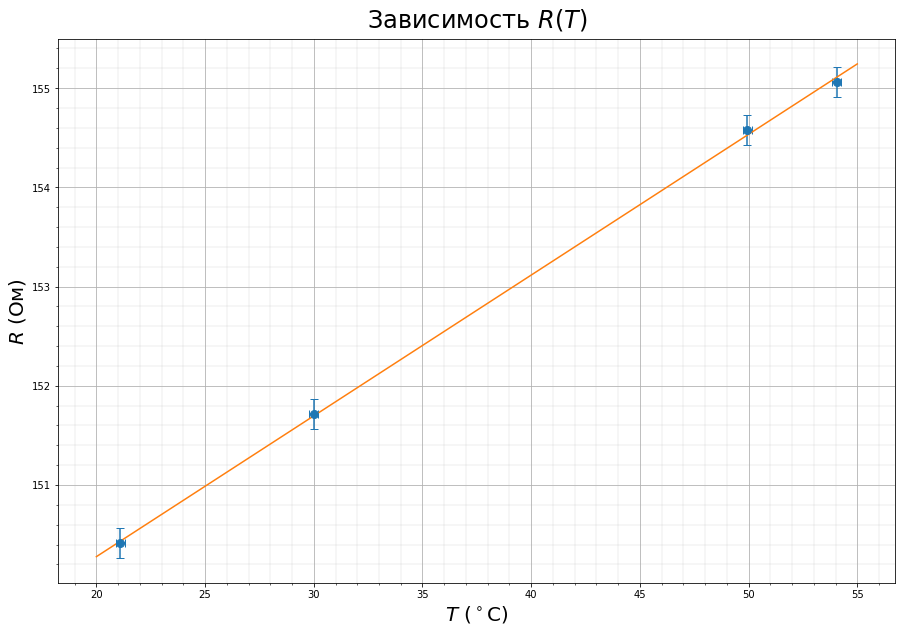

                    R = aT + b

a                   b                 R(0)
0.14189783492537195 147.4396976001064 147.4396976001064


In [154]:
r_t_opt, r_t_cov = curve_fit(f, t, r)
# r_t_opt = [a, b]; R = aT + b

plt.figure(figsize = (15, 10))
plt.title('Зависимость $R(T)$', fontsize=24, pad=12)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$T$ ($^\circ$С)', fontsize=20)
plt.ylabel('$R$ (Ом)', fontsize=20)
plt.errorbar(t, r, linestyle='', marker='o', xerr=0.2, yerr=0.15, markersize=8, capsize=4)
xdata = np.arange(20, 56)
plt.plot(xdata, f(xdata, *r_t_opt))
plt.show()

print(' ' * 20 + 'R = aT + b' + '\n')
print('a' + ' ' * 19 + 'b' + ' ' * 17 + 'R(0)')
print(*r_t_opt, f(0, *r_t_opt))

$$ R_{273} \approx 147,44 \hspace{2pt}\text{Ом}, \hspace{20pt} \frac{dR}{dT} \approx 0,142 \frac{\text{Ом}}{\text{К}}, $$

In [78]:
alpha = r_t_opt[0] / f(0, *r_t_opt)
print('alpha =', alpha)

alpha = 0.0009624126828463432


Отсюда

$$ \alpha \approx 9,62 \cdot 10^{-4} \hspace{2pt} \text{К}^{-1} .$$

### Оценим погрешность $\frac{dR}{dT}$.

In [140]:
s = 0
for i in range(len(t)):
    s += (r[i] - f(t[i], *r_t_opt)) ** 2
s = math.sqrt(s / len(t))
print('среднеквадратичная погрешность R:', s)

eps_t = 0.2 / 20
print('относительная погрешность T:' + ' ' * 5, eps_t)
eps_r = 0.000035 * math.sqrt(2) / 0.05
print('относительная погрешность R:' + ' ' * 5, eps_r)
eps_drdt = math.sqrt(eps_t ** 2 + eps_r ** 2 + s ** 2)
print('\n' + '-' * 10 + 'Погрешность dR/dT' + '-' * 10)
print('систематическая:', math.sqrt(eps_t ** 2 + eps_r ** 2))
print('случайная:' + ' ' * 6, s)
print('относительная:' + ' ' * 2, eps_drdt)
print('абсолютная:' + ' ' * 5, eps_drdt * r_t_opt[0])

среднеквадратичная погрешность R: 0.03591841848527039
относительная погрешность T:      0.01
относительная погрешность R:      0.0009899494936611664

----------Погрешность dR/dT----------
систематическая: 0.010048880534666536
случайная:       0.03591841848527039
относительная:   0.03729762440803722
абсолютная:      0.005292452151360189


$$\varepsilon_T = 0,01$$
$$\varepsilon_R = 0,1$$
$$\varepsilon_{dR/dT} \approx 0,11 \Rightarrow \sigma_{dR/dT} \approx 0,015 \frac{\text{Ом}}{\text{К}}$$

### Для каждой температуры определим значение $\varkappa$.

$$ \varkappa = \frac{dQ}{dT} \cdot \frac{1}{2\pi L} \ln\frac{r_2}{r_1} $$

$$ \frac{dQ}{dT} = \frac{dQ}{dR} \frac{dR}{dT} $$

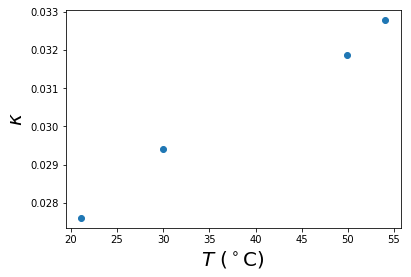

  kappa          T
[[2.76105019e-02 2.11000000e+01]
 [2.94117739e-02 3.00000000e+01]
 [3.18551188e-02 4.99500000e+01]
 [3.27762452e-02 5.40500000e+01]]


In [142]:
dqdt = np.array(dqdr) * r_t_opt[0]
kappa = dqdt * math.log(r_2 / r_1) / (2 * math.pi * L)

plt.xlabel('$T$ ($^\circ$С)', fontsize=20)
plt.ylabel('$\kappa$', fontsize=20)
plt.plot(t, kappa, linestyle='', marker='o')
plt.show()

print(' ' * 2 + 'kappa' + ' ' * 10 + 'T')
print(np.transpose([kappa, t]))

In [143]:
def g(x, a, b):
    return a * (x ** b)

k_t_opt, k_t_cov = curve_fit(g, t, kappa)

eps_kappa = math.sqrt(eps_drdt ** 2 + eps_r ** 2)

s = 0
for i in range(len(t)):
    s += (kappa[i] - g(t[i], *k_t_opt)) ** 2
s = math.sqrt(s / len(t))

print('\n' + '-' * 9 + 'Погрешность kappa' + '-' * 9)
print('случайная:', s)
print('систематическая:', eps_kappa)
eps_kappa = math.sqrt(eps_kappa ** 2 + s ** 2)
print('относительная: ', eps_kappa)
print('абсолютная: ' + ' ' * 3, eps_kappa * kappa[3])


---------Погрешность kappa---------
случайная: 0.0001696563441120427
систематическая: 0.03731075966102826
относительная:  0.03731114538255441
абсолютная:     0.0012229192506613945


### Оценим погрешность $\varkappa$.

$$\varepsilon_\varkappa = \sqrt{\varepsilon_{dR/dT}^2 + \varepsilon_R^2} \approx 0,04 \Rightarrow \sigma_\kappa \approx 0,001$$

In [122]:
print('A' + ' ' * 20 + 'beta')
print(*k_t_opt)

A                    beta
0.01618887005550167 0.17512116122980548


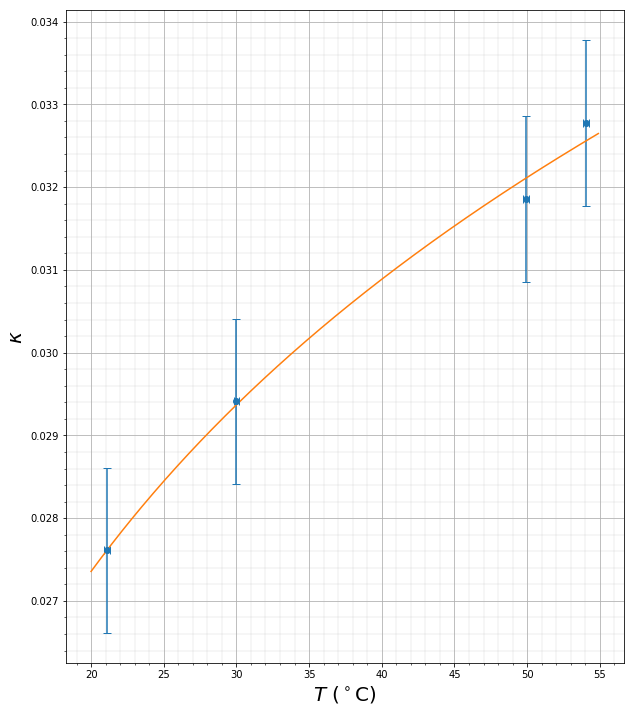

In [147]:
plt.figure(figsize = (10, 12))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$T$ ($^\circ$С)', fontsize=20)
plt.ylabel('$\kappa$', fontsize=20)
plt.errorbar(t, kappa, linestyle='', marker='o', xerr=0.2, yerr=0.001, capsize=4)
xdata = np.arange(20, 55, 0.1)
ydata = g(xdata, *k_t_opt)
plt.plot(xdata, ydata)
plt.show()

In [83]:
ln_kappa = np.array([math.log(i) for i in kappa])
ln_t = np.array([math.log(i) for i in t])

ln_k_t_opt, ln_k_t_cov = curve_fit(f, ln_t, ln_kappa)

print('beta' + ' ' * 16 + 'lnA')
print(*ln_k_t_opt)

beta                lnA
0.1749149654363687 -4.122700701764678


$$\beta \approx 0,19$$

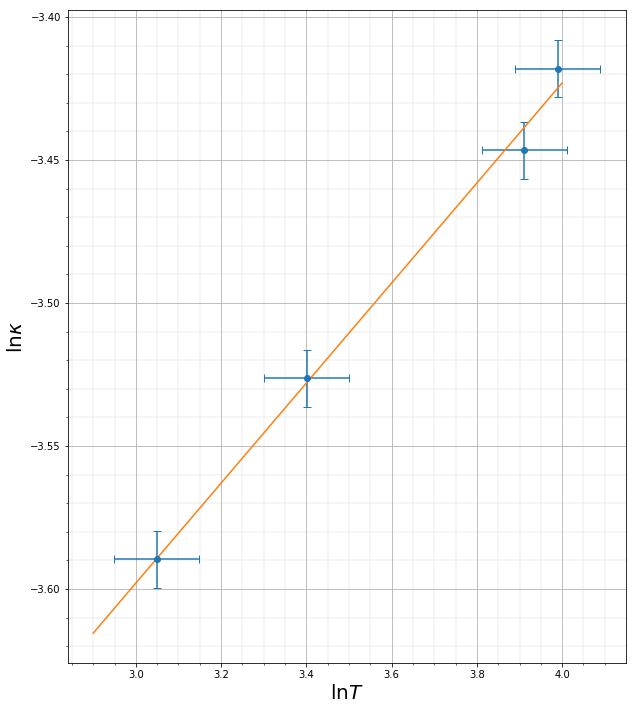

In [146]:
plt.figure(figsize = (10, 12))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$\ln T$', fontsize=20)
plt.ylabel('$\ln\kappa$', fontsize=20)
plt.errorbar(ln_t, ln_kappa, linestyle='', marker='o', xerr=0.1, yerr=0.01, capsize=4)
xdata = np.arange(2.9, 4.1, 0.1)
ydata = f(xdata, *ln_k_t_opt)
plt.plot(xdata, ydata)
plt.show()

### Оценим погрешность $\beta$.

In [85]:
s = 0
for _ in range(len(ln_t)):
    s += (ln_kappa[i] - f(ln_t[i], *ln_k_t_opt)) ** 2
s

0.00018249604375290094